In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [23]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

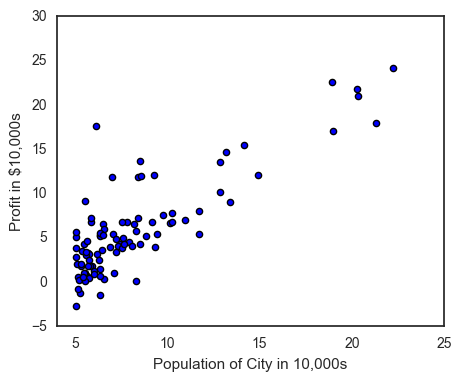

In [24]:
plt.figure(figsize=(5,4))
plt.scatter(X[:, 1], y, linewidths=1)
plt.xlim([4, 25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [31]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0.
    h = X.dot(theta)   
    J = 1./(2*m)*np.sum(np.square(y-h))
    return J

In [37]:
computeCost(X, y)

32.072733877455676

In [63]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for i in xrange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1./m)*(X.T.dot(h-y))
        J_history[i] = computeCost(X, y, theta)
    return (theta, J_history)

('theta: ', array([-3.63029144,  1.16636235]))


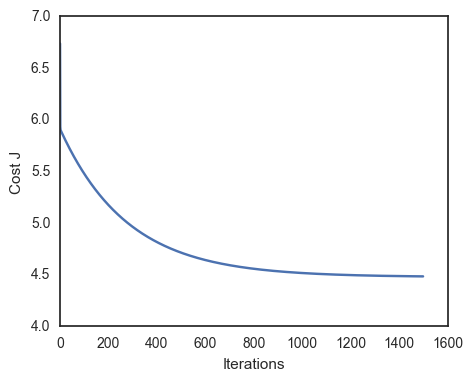

In [64]:
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())
plt.figure(figsize=(5,4))
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

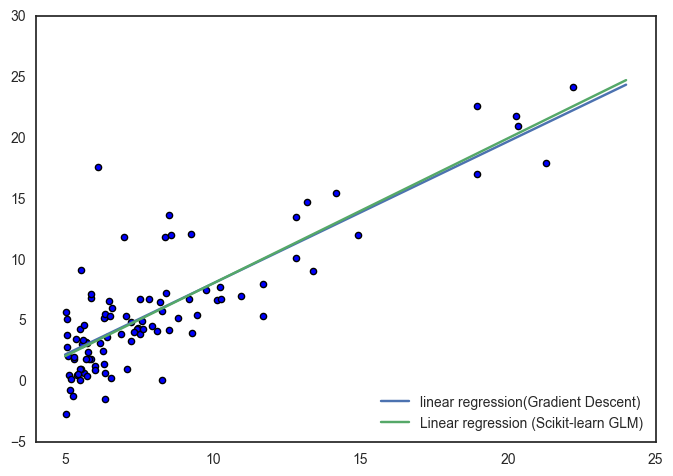

In [65]:
xx = np.arange(5, 25, )
yy = theta[0] + theta[1]*xx

plt.scatter(X[:, 1], y, linewidths=1)
plt.xlim([4, 25])
plt.plot(xx, yy, label="linear regression(Gradient Descent)")

regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1, 1), y.ravel())

plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')
plt.legend(loc=4);